# Optional Lab - Neurons and Layers
In this lab, we will explore the inner workings of neurons/units and layers. In particular, the lab will draw parallels to the models you have mastered in Course , the regression/linear model and the logistic model. The lab will introduce Tensorflow and demonstrate how these models are implemented in that framework

# Packages
## Tensorflow and Keras


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# Neuron without activation - Regression/Linear Model
## DataSet


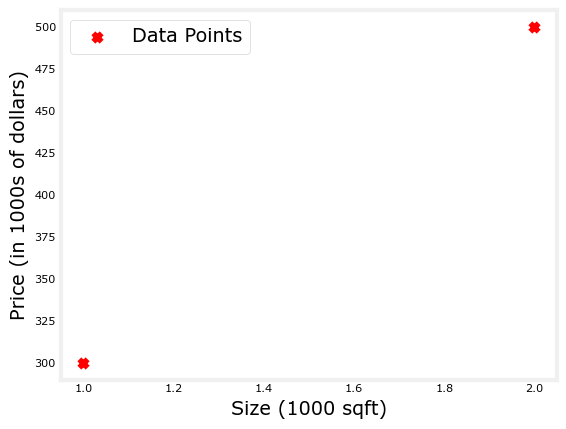

In [2]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)

fig, ax = plt.subplots(1, 1)
ax.scatter(X_train, Y_train, marker='x',c='r', label="Data Points")
ax.legend(fontsize='xx-large')
ax.set_ylabel("Price (in 1000s of dollars)", fontsize='xx-large')
ax.set_xlabel("Size (1000 sqft)", fontsize='xx-large')
plt.show()

# Regression/Linear Model

In [3]:
linear_layer = Dense(units=1, activation='linear')

In [4]:
linear_layer.get_weights()

[]

In [5]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)

tf.Tensor([[1.46]], shape=(1, 1), dtype=float32)


In [6]:
w, b = linear_layer.get_weights()
print(f"w = {w}, b = {b}")

w = [[1.46]], b = [0.]


In [7]:
set_w = np.array([[200]])
set_b = np.array([100])

# Set_weights takes a list of numpt arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [8]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1, 1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [9]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

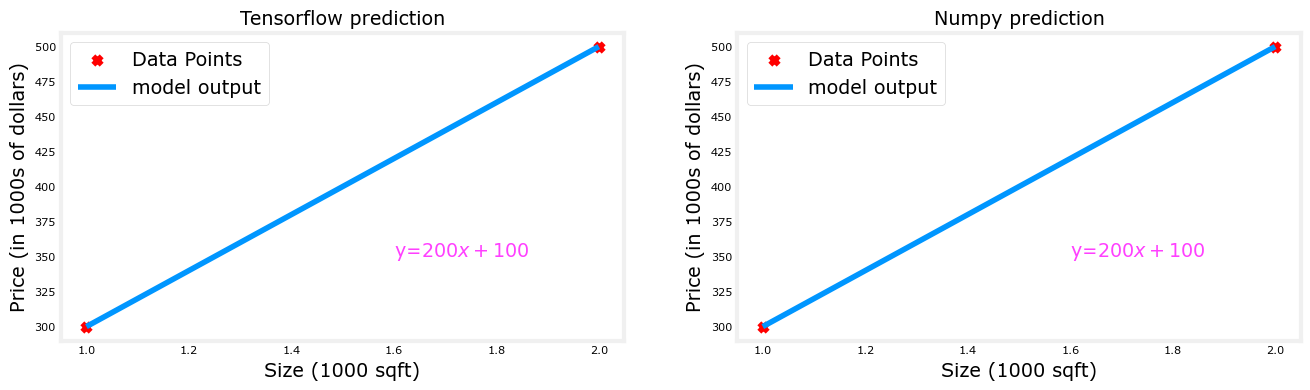

In [10]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

# Neuron with Sigmoid activation
## DataSet

In [11]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1, 1)
Y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1, 1)

In [12]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

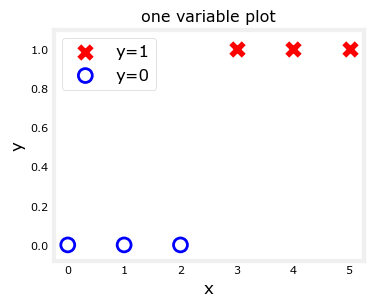

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c='red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors="none",
                                      edgecolors='blue', lw=2)
ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

# Logictic Neuron

In [19]:
model = Sequential(
[
    tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name="L1")
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)

[[0.37]] [0.]
(1, 1) (1,)


In [22]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [23]:
a1 = model.predict(X_train[0].reshape(1, 1))
print(a1)
alog = sigmoidnp(np.dot(set_w, X_train[0].reshape(1, 1)) + set_b)
print(alog)

1/1 [==============================] - 4s 4s/step
[[0.01]]
[[0.01]]


1/1 [==============================] - 0s 58ms/step


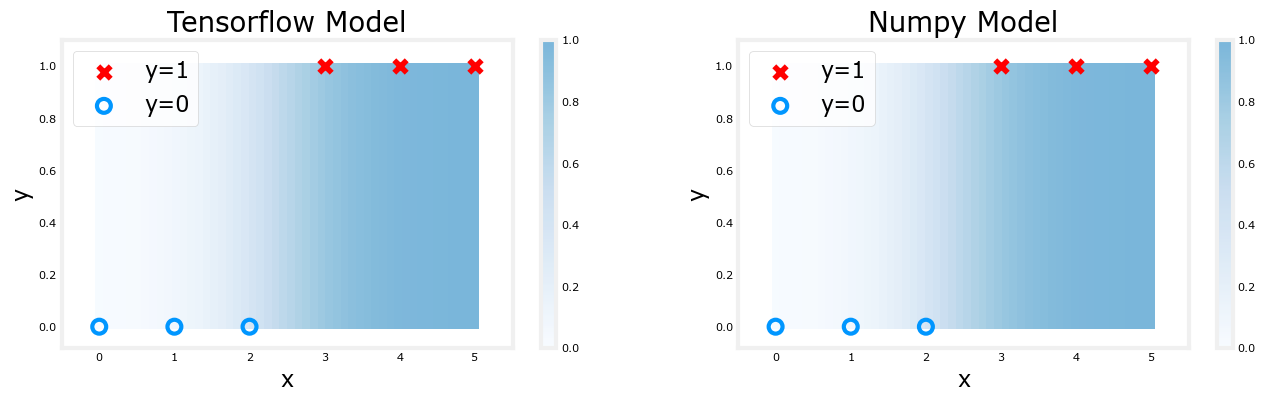

In [25]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

# Congratulations
You built a very simple network and have explored the similarities of a neuron to the linear and logistic regression from Course 1